# URLs Finder
Part of [Starter Kit](https://github.com/EnterpriseCharacteristicsESSnetBigData/StarterKit "GitHub repositiry of Starter Kit on Enterprise characteristics") of [ESSnet BigData](https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/ESSnet_Big_Data "ESSnet Big Data is a project within the European statistical system (ESS) jointly undertaken by 28 partners.") on [WPC Enterprise characteristics](https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/WPC_Enterprise_characteristics "Workpackage C (WPC) of ESSnet Big Data focuses on enterprise characteristics.")

## 1. Brief description

URLs Finder is a [Python](https://www.python.org/) software for finding enterprises' urls from information in Statistical Business Registers by using web scraping and machine learning. It has tree modules:
- URLsFinder \- defines methods for scraping information for the enterprises' urls from the internet with the help of search engine [Duck Duck Go](https://duckduckgo.com "The best search engine for privacy").
- URLsFinderPrepare \- defines methods for determine the enterprises' urls from the scraped information from the internet by using logistic regersion machine learning technic.
- StarterKitLogging (optional to use) \- defines methods for storing log records for the others modules work.

These are the [Pythons'](https://www.python.org/) libraries and components that URLs Finder modules need:
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [glob](https://docs.python.org/3/library/glob.html) is an Unix style pathname pattern expansion.
- [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
- [requests](https://pypi.org/project/requests/) allows you to send HTTP/1.1 requests extremely easily.
- [re](https://docs.python.org/3/library/re.html) provides regular expression matching operations similar to those found in Perl.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [time](https://docs.python.org/3/library/time.html) provides various time-related functions.
- [unquote](https://docs.python.org/3/library/urllib.parse.html) replace %xx escapes by their single-character equivalent.
- [urlparse](https://docs.python.org/3/library/urllib.parse.html) parse a URL into six components, returning a 6-item named tuple. This corresponds to the general structure of a URL: scheme://netloc/path;parameters?query#fragment.
- [tqdm](https://pypi.org/project/tqdm/) provides a progress bar.
- [datetime](https://docs.python.org/3/library/datetime.html) module supplies classes for manipulating dates and times.
- [logging](https://docs.python.org/3/library/logging.html) defines functions and classes which implement a flexible event logging system for applications and libraries.

These are the variables that URLs Finder modules uses:
- **version** \- identification of the scraped files by date, id or other.
- **title** \- name of the project, also used for scraped files names.
- **startpath** \- directory where a csv file with Enterprises information is located.
- **scrapepath** \- directory where a csv files with scraped Enterprises information are saved.
- **logpath** \- directory where event logging information is saved. 
- **blacklistpath** \- directory where a csv file with blacklisted URLs is located.
- **startfile** \- name of a csv file with Enterprises information.
- **scrapefile** \- name of a csv file with scraped information from websites.
- **sapifile** \- name of a csv file with scraped information from search engine [Duck Duck Go](https://duckduckgo.com "The best search engine for privacy").
- **toscrapefile** \- name of a csv file with URLs from websites that will be scraped.
- **logfile** \- name of a events log file.
- **blacklistfile** \- name of a csv file with blacklisted URLs.
- **csv_delimiter** \- delimiter of the csv file, eg.: ";".
- **csv_encoding** \- encoding of the csv file, eg.: "utf-8".
- **headers** \- HTTP request header information.

## 2. Preparing the work environment



### 2.1. Configure the work environment

Making the URLs Finder modules folder available to the environment. In this case ***'../src/'*** the modules are in folder ***src*** one level above current Jupyter workbook folder.

Loading the ***datetime*** library to be used for files' versions.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))
from datetime import datetime


### 2.2. Initializing the variables



In [2]:
version=datetime.now().strftime('%Y-%m-%d')
title='URLs Finder Starter Kit'
startpath='.\\sbr_data\\'
scrapepath='.\\scrape_data\\'
logpath='.\\logs\\'
blacklistpath='.\\black_list_urls\\'
startfile='SBR_Data_ESSnet.csv'
scrapefile='URLs_Finder_Starter_Kit_Scrape_Data_{0}.csv'.format(version)
sapifile='URLs_Finder_Starter_Kit_SAPI_Data_{0}.csv'.format(version)
toscrapefile='URLs_Finder_Starter_Kit_to_Scrape_Data_{0}.csv'.format(version)
logfile='URLs_Finder_Starter_Kit_Log_Data.log'
blacklistfile='black_list_urls.csv'
csv_delimiter=';'
csv_encoding = 'utf-8'
headers = {
    'user-agent': 'ESSnet BigData WPC URLs Finder Starter Kit - https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/ESSnet_Big_Data'.encode('utf-8'),
    'Accept-Charset': 'utf-8'
}

### 2.3. Loading URLs Finder event logging module

This is an optional step.

In [3]:
from StarterKitLogging import StarterKitLogging

#### 2.3.1. Event logging initialization and start

The event logging is in debug mode.

In [4]:
log=StarterKitLogging(logpath,logfile,title)
log.startLogging()

## 3. Finding candidat web pages to be Enterprises' URLs

### 3.1. Loading URLs Finder web scraping module

The web scraping module contains one class called ***URLsFinder***. 

In [5]:
from URLsFinder import URLsFinder

### 3.2. Making an instance of URLs Finder web scraping module

This is done by calling ***main*** method of the ***URLsFinder*** class with the following parameters (variables we defined):
- startpath
- startfile
- csv_delimiter
- csv_encoding
- scrapepath
- sapifile
- toscrapefile
- scrapefile
- headers
- blacklistpath
- blacklistfile

In [6]:
uf=URLsFinder(startpath,startfile,csv_delimiter,csv_encoding,scrapepath,sapifile,toscrapefile,scrapefile,headers,blacklistpath,blacklistfile)

### 3.3. Loading Enterprises information

This is done by calling ***loadFiles*** method of the ***URLsFinder*** class without parameters. The method returns a **pandas dataframe object** with Enterprises information from the csv file with name from variable **startfile** in the directory with path in the variable **startpath**.

In [482]:
frame=uf.loadFiles()
frame

.\sbr_data\SBR_Data_ESSnet.csv
All records (204, 7)


,ID,Name,URL,Phone,Email,Address,Populated place
0,000695146,National Statistical Institute,https://www.nsi.bg,(+359 2) 9857 111,info@nsi.bg,"2, P. Volov Str.;1038 Sofia, Bulgaria",Sofia
1,000000000,National Statistical Institute,,(+359 2) 9857 111,info@nsi.bg,"2, P. Volov Str.;1038 Sofia, Bulgaria",Sofia
2,000000001,STATISTIK AUSTRIA,http://www.statistik.at,+43 (1) 711 28-0,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
3,000000002,STATISTIK AUSTRIA,,+43 (1) 711 28-0,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
4,000000003,STATISTIK AUSTRIA,,+43 (1) 711 28-0,,Österreich Guglgasse 13 1110 Wien,Wien
5,000000004,STATISTIK AUSTRIA,,,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
6,000000005,STATISTIK AUSTRIA,,,,Österreich Guglgasse 13 1110 Wien,Wien
7,000000006,Institute of Statistics,http://www.instat.gov.al,+355 (4) 2233356,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana
8,000000007,Institute of Statistics,,+355 (4) 2233356,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana
9,000000008,Institute of Statistics,http://www.instat.gov.al,,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana


### 3.4. Loading a blacklisted URLs

This is done by calling ***loadFiles*** method of the ***URLsFinder*** class with parameter **file** equal to **blacklist**. The method returns a **pandas dataframe** object with blaklisted URLs form the csv file with name from variable **blacklistfile** in the directory with path in the variable **blacklistpath**.

In [8]:
bl=uf.loadFiles(file='blacklist')
bl=bl['Black list URLs'].sort_values(ascending=True).unique().tolist()
bl

.\black_list_urls\black_list_urls.csv
All records (70, 1)


['abcnews.bg',
 'baq.kz',
 'bcc.bg',
 'bezplatno.net',
 'bgfirms.info',
 'bgproizvoditel.com',
 'bgrabotodatel.com',
 'bgregistar.com',
 'bgstart.net',
 'bia-bg.com',
 'bivol.bg',
 'biznes-bulgaria.com',
 'biznes-catalog.com',
 'biznes-katalog.com',
 'biznes-spravka.com',
 'bizneslist.com',
 'blitz.bg',
 'btcatalogue.bg',
 'business.bg',
 'catalog.bg',
 'cks.bg',
 'dnevnik.bg',
 'econ.bg',
 'eufunds.bg',
 'facebook.com',
 'firma.bg',
 'genderportal.eu',
 'glassdoor.com',
 'goldenpages.bg',
 'google.com',
 'government.bg',
 'grabo.bg',
 'grabvai.com',
 'inegi.org.mx',
 'info-register.com',
 'infobel.bg',
 'infomreja.bg',
 'informator.bg',
 'investor.bg',
 'jobs.bg',
 'jobtiger.bg',
 'kartasofia.com',
 'korektnafirma.com',
 'linkedin.com',
 'nacionalen-biznes.com',
 'official-portal.com',
 'online-registri.com',
 'osnatpk.com',
 'papagal.bg',
 'pisar.bg',
 'playbookmaker.ru',
 'referatite.org',
 'registarnastroitelstvoto.com',
 'stroiteli-bg.com',
 'stroitelstvoto.bg',
 'subscribe.ru',
 

### 3.5. Querying a Search Engine with Enterprises information

This is done by calling ***querySearchEngine*** method of the ***URLsFinder*** class with the following parameters:
- **pandas dataframe object** with Enterprises information
- **timeout** parameter with number of seconds for keep the request open (optional, default 3)
- **sleep** parameter with number of seconds between each query request to the Search Engine (optional, default 6)

The method saves csv file with Suggested Enterprises URLs from Querying the Search Engine by the name in variable **sapifile** in directory in variable **scrapepath**.

The method returns two **pandas dataframe objects**:
- Suggested Enterprises URLs from Querying the Search Engine (first pandas dataframe object)
- Errors from Querying the Search Engine (second pandas dataframe object)

In [9]:
dfn=uf.querySearchEngine(frame,timeout=5,sleep=6)

processed: 000000211 Statistics Sweden : 100%|███████████████████████████████████████| 204/204 [23:20<00:00,  6.87s/it]    


#### 3.5.1. Displaying successful results from Querying a Search Engine with Enterprises information

The **pandas dataframe object** with Suggested Enterprises URLs has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Has equal domain** (1 if domains of known and suugested URLs are equal else 0)

In [10]:
dfn[0]

,Has equal domain,ID,Link position,Name,Suggested URL,URL
0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg
1,0.0,000695146,1.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg
2,0.0,000695146,2.0,National Statistical Institute,https://en.wikipedia.org/wiki/List_of_national...,https://www.nsi.bg
3,0.0,000695146,3.0,National Statistical Institute,https://www.niss.org/,https://www.nsi.bg
4,0.0,000695146,4.0,National Statistical Institute,https://ec.europa.eu/eurostat/web/links,https://www.nsi.bg
5,0.0,000695146,5.0,National Statistical Institute,https://www.ons.gov.uk/,https://www.nsi.bg
6,0.0,000695146,6.0,National Statistical Institute,https://www.statistics.gov.rw/statistical-publ...,https://www.nsi.bg
7,0.0,000695146,7.0,National Statistical Institute,https://nis.gov.kh/,https://www.nsi.bg
8,0.0,000695146,8.0,National Statistical Institute,https://en.wikipedia.org/wiki/National_Statist...,https://www.nsi.bg
9,0.0,000695146,9.0,National Statistical Institute,https://www.statistics.gr/en/home/,https://www.nsi.bg


#### 3.5.2. Displaying unsuccessful results from Querying a Search Engine with Enterprises information

The **pandas dataframe object** with Errors from Querying the Search Engine.

In [11]:
dfn[1]

""


### 3.6. Removing blacklisted URLs from successful Search Engine results

This is done by calling ***blacklistURLs*** method of the ***URLsFinder*** class with parameter **pandas dataframe object** with blaklisted URLs.
    
This method removes rows from **pandas dataframe object** with Suggested Enterprises URLs if Suggested URL domain is blacklisted. The method returns **pandas dataframe object** with Suggested Enterprises URLs without blacklisted ones.
The **pandas dataframe object** has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Has equal domain** (1 if domains of known and suugested URLs are equal else 0)
- **Has Simple Suggested URL** (1 if Suggested URL contains only protocol, domain and language path "en" else 0)

In [12]:
dfns=uf.blacklistURLs(bl)
dfns

,Has equal domain,ID,Link position,Name,Suggested URL,URL,Has Simple Suggested URL
0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,1
1,0.0,000695146,1.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,0
3,0.0,000695146,3.0,National Statistical Institute,https://www.niss.org/,https://www.nsi.bg,1
4,0.0,000695146,4.0,National Statistical Institute,https://ec.europa.eu/eurostat/web/links,https://www.nsi.bg,0
5,0.0,000695146,5.0,National Statistical Institute,https://www.ons.gov.uk/,https://www.nsi.bg,1
6,0.0,000695146,6.0,National Statistical Institute,https://www.statistics.gov.rw/statistical-publ...,https://www.nsi.bg,0
7,0.0,000695146,7.0,National Statistical Institute,https://nis.gov.kh/,https://www.nsi.bg,1
9,0.0,000695146,9.0,National Statistical Institute,https://www.statistics.gr/en/home/,https://www.nsi.bg,0
10,0.0,000000000,0.0,National Statistical Institute,https://www.nsi.bg/en,NaN,1
11,0.0,000000000,1.0,National Statistical Institute,http://www.insse.ro/cms/en,NaN,0


### 3.7. Finding URLs to scrape

This is done by calling ***getURLsToScrape*** method of the ***URLsFinder*** class with the following parameters:
- **pandas dataframe object** with Suggested Enterprises URLs without blacklisted ones
- **timeout** parameter with number of seconds for keep the request open (optional, default 5)
- **sleep** parameter with number of seconds between each query request to the Search Engine (optional, default 1)
- **urlsatstart** parameter with number of URLs to get from the beginning of the web page (optional, default 10)
- **urlsatend** parameter with number of URLs to get from the end of the web page (optional, default 10)

The method saves csv file with URLs to scrape by the name in variable **toscrapefile** in directory in variable **scrapepath**.

The method returns two **pandas dataframe objects**:
- URLs to scrape (first pandas dataframe object)
- Errors from requesting Suggested Enterprises URLs without blacklisted ones (second pandas dataframe object)

In [13]:
dfnt=uf.getURLsToScrape(dfns,timeout=5,sleep=0.5,urlsatstart=10,urlsatend=10)

processed: 000000211 https://dic.academic.ru/dic.nsf/enwiki/246605 : 100%|█████████| 1571/1571 [44:45<00:00,  1.19s/it]                                                                                                                                                                                           


#### 3.7.1. Displaying successful results from Finding URLs to scrape

The **pandas dataframe object** with URLs to scrape has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Has equal domain** (1 if domains of known and suugested URLs are equal else 0)
- **Has Simple Suggested URL** (1 if Suggested URL contains only protocol, domain and language path "en" else 0)
- **URL to scrape** (first *urlsatstart* and last *urlsatend* URLs taken from the Suggested URL web page)

In [14]:
dfnt[0]

,Has Simple Suggested URL,Has equal domain,ID,Link position,Name,Suggested URL,URL,URL to scrape
0,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/
1,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en
2,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/bg
3,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/24/basic-page/co...
4,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/23/basic-page/links
5,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/biblioteka/en/
6,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11237
7,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11224
8,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/14881/
9,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/aggregator/sources/1


#### 3.7.2. Displaying unsuccessful results from Finding URLs to scrape

The **pandas dataframe object** with Errors from requesting Suggested Enterprises URLs without blacklisted ones.

The **pandas dataframe object** has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Error** (Description of the error encountered)

In [15]:
dfnt[1]

,Error,ID,Link position,Name,Suggested URL,URL
0,Connection problems,000695146,6.0,National Statistical Institute,https://www.statistics.gov.rw/statistical-publ...,https://www.nsi.bg
1,Connection problems,000000000,6.0,National Statistical Institute,https://www.statistics.gov.rw/statistical-publ...,NaN
2,Connection problems,000000006,5.0,Institute of Statistics,https://www.statistics.gov.rw/statistical-publ...,http://www.instat.gov.al
3,Connection problems,000000007,5.0,Institute of Statistics,https://www.statistics.gov.rw/statistical-publ...,NaN
4,Connection problems,000000008,6.0,Institute of Statistics,https://www.statistics.gov.rw/statistical-publ...,http://www.instat.gov.al
5,Connection problems,000000009,5.0,Institute of Statistics,https://www.statistics.gov.rw/statistical-publ...,http://www.instat.gov.al
6,Connection problems,000000010,4.0,Institute of Statistics,https://www.statistics.gov.rw/statistical-publ...,NaN
7,Connection problems,000000011,2.0,Departament d´Estadística,https://www.bcn.cat/estadistica/catala/index.htm,https://www.estadistica.ad/serveiestudis/web/i...
8,Connection problems,000000012,3.0,Departament d´Estadística,https://www.bcn.cat/estadistica/catala/index.htm,https://www.estadistica.ad/serveiestudis/web/i...
9,Connection problems,000000013,3.0,Departament d´Estadística,https://www.bcn.cat/estadistica/catala/index.htm,NaN


### 3.8. Scraping URLs

This is done by calling ***scrapeURLs*** method of the ***URLsFinder*** class with the following parameters:
- **pandas dataframe object** with Enterprises information
- **pandas dataframe object** with URLs to scrape
- **timeout** parameter with number of seconds for keep the request open (optional, default 5)
- **sleep** parameter with number of seconds between each query request to the Search Engine (optional, default 1)

The method saves csv file with scraped URLs by the name in variable **scrapefile** in directory in variable **scrapepath**.

The method returns two **pandas dataframe objects**:
- scraped URLs (first pandas dataframe object)
- Errors from requesting URLs to scrape (second pandas dataframe object)

In [16]:
dfnes=uf.scrapeURLs(frame,dfnt[0],timeout=5,sleep=0.5)

processed: 000000211 https://dic.academic.ru/ : 100%|██████████████████████████| 19024/19024 [7:15:32<00:00,  1.01s/it]                                                                                                                                                                                                                                                          


#### 3.8.1. Displaying successful results from Scraping URLs

The **pandas dataframe object** with scraped URLs has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Has equal domain** (1 if domains of known and suugested URLs are equal else 0)
- **Has Simple Suggested URL** (1 if Suggested URL contains only protocol, domain and language path "en" else 0)
- **URL to scrape** (first *urlsatstart* and last *urlsatend* URLs taken from the Suggested URL web page)
- **Status code** (status code from URL to scrape HTTP request)
- **Has ID** (1 **if** Enterprise SBR ID is found in scraped URL web page text **else** 0)
- **Has Name** (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- **Has Phone** (1 **if** Enterprise Phone is found in scraped URL web page text **else** 0)
- **Has Address** (1 **if** Enterprise Address is found in scraped URL web page text **else** 0)
- **Has Populated place** (1 **if** Enterprise Populated place location is found in scraped URL web page text **else** 0)
- **Has Email** (1 **if** Enterprise Email is found in scraped URL web page text **else** 0)
- **Has Name** (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- **Has equal Email and URL Domains** (1 **if** Enterprise Email domain is equal to Suggested URL domain **else** 0)

In [17]:
dfnes[0]

,Has Address,Has Email,Has ID,Has Name,Has Phone,Has Populated place,Has Simple Suggested URL,Has equal Email and URL Domains,Has equal domain,ID,Link position,Name,Status code,Suggested URL,URL,URL to scrape
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/bg
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/24/basic-page/co...
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/23/basic-page/links
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/biblioteka/en/
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/14881/
7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/aggregator/sources/1
8,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/20/basic-page/ab...
9,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/99/basic-page/le...


#### 3.8.2. Displaying unsuccessful results from Scraping URLs

The **pandas dataframe object** with Errors from requesting URL to scrape.

The **pandas dataframe object** has the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **URL to scrape** (URL that has been requested and yields error)
- **Error** (Description of the error encountered)

In [18]:
dfnes[1]

,Error,ID,Link position,Name,Suggested URL,URL,URL to scrape
0,Timeout occurred,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11237
1,Timeout occurred,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11224
2,Timeout occurred,000000002,8.0,STATISTIK AUSTRIA,https://www.jewiki.net/wiki/Statistik_Austria,NaN,https://www.jewiki.net/wiki/Österreich
3,Timeout occurred,000000002,8.0,STATISTIK AUSTRIA,https://www.jewiki.net/wiki/Statistik_Austria,NaN,https://www.jewiki.net/wiki/Bundeskanzleramt_(...
4,Connection problems,000000017,0.0,National Statistical Committee of the Republic...,https://www.belstat.gov.by/,https://www.belstat.gov.by,http://www.belstat.gov.by/ofitsialnaya-statist...
5,Timeout occurred,000000017,7.0,National Statistical Committee of the Republic...,https://www.slideserve.com/alanna/national-sta...,https://www.belstat.gov.by,https://www.slideserve.com/updates
6,Timeout occurred,000000019,5.0,National Statistical Committee of the Republic...,https://www.slideserve.com/alanna/national-sta...,NaN,https://www.slideserve.com/updates
7,Connection problems,000000022,8.0,Statistics Belgium,https://www.fctables.com/national/belgium/,https://statbel.fgov.be,https://www.fctables.com/user/login_facebook/
8,Connection problems,000000023,8.0,Statistics Belgium,https://www.fctables.com/national/belgium/,NaN,https://www.fctables.com/user/login_facebook/
9,Timeout occurred,000000026,4.0,Federal Statistical Office,https://wiki2.org/en/Federal_Statistical_Offic...,https://www.destatis.de,https://wiki2.org/en/WIKI2:privacy_policy


## 4. Find Enterprises' URLs with Machine Learning

### 4.1. Loading URLs Finder machine learning module

In [3]:
from URLsFinderPrepare import URLsFinderPrepare

### 4.2. Making an instance of URLs Finder machine learning module

This is done by calling ***main*** method of the ***URLsFinderPrepare*** class with the following parameters (variables we defined):
- csv_delimiter
- csv_encoding
- scrapepath
- scrapefile

In [4]:
ufp=URLsFinderPrepare(csv_delimiter,csv_encoding,scrapepath,scrapefile)

### 4.3. Scoring the URLs

This is done by calling ***prepareFile*** method of the ***URLsFinderPrepare*** class without any parameters (variables we defined).

The method reads csv file with scraped URLs by the name in variable **scrapefile** in directory in variable **scrapepath**.

The method returns a **pandas dataframe object** with the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Has equal domain** (1 if domains of known and suugested URLs are equal else 0)
- **Has Simple Suggested URL** (1 if Suggested URL contains only protocol, domain and language path "en" else 0)
- **Status code** (status code from URL to scrape HTTP request)
- **Has ID** (1 **if** Enterprise SBR ID is found in scraped URL web page text **else** 0)
- **Has Name** (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- **Has Phone** (1 **if** Enterprise Phone is found in scraped URL web page text **else** 0)
- **Has Address** (1 **if** Enterprise Address is found in scraped URL web page text **else** 0)
- **Has Populated place** (1 **if** Enterprise Populated place location is found in scraped URL web page text **else** 0)
- **Has Email** (1 **if** Enterprise Email is found in scraped URL web page text **else** 0)
- **Has Name** (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- **Has equal Email and URL Domains** (1 **if** Enterprise Email domain is equal to Suggested URL domain **else** 0)
- **Has URL** (1 **if** URL is not Null **else** 0)
- **sum** (**SUM** of Has equal Email and URL Domains, Has Email, Has Name, Has Phone, Has Address, Has ID and Has Populated place **Grouped by** ID, Name, Suggested URL, Link position and Status code and **aggregated** in column **sum**)

The method makes **deduplication** by all columns with keeping only first occurrence after the **SUM** operation.

In [5]:
dflr=ufp.prepareFile()
dflr

,ID,Name,Suggested URL,Link position,Status code,Has Address,Has Email,Has ID,Has Name,Has Phone,Has Populated place,Has Simple Suggested URL,Has equal Email and URL Domains,Has equal domain,sum,URL,Has URL
0,000000000,National Statistical Institute,https://www.nsi.bg/en,0.0,200.0,0,1,0,1,1,1,1,1,0,66.0,NaN,0
1,000000000,National Statistical Institute,https://www.niss.org/,3.0,200.0,0,0,0,0,0,0,1,0,0,0.0,NaN,0
2,000000000,National Statistical Institute,https://ec.europa.eu/eurostat/web/links,4.0,200.0,0,1,0,1,0,1,0,0,0,4.0,NaN,0
3,000000000,National Statistical Institute,https://www.ons.gov.uk/,5.0,200.0,0,0,0,1,0,0,1,0,0,2.0,NaN,0
4,000000000,National Statistical Institute,https://nis.gov.kh/,7.0,200.0,0,0,0,0,0,0,1,0,0,0.0,NaN,0
5,000000000,National Statistical Institute,https://www.statistics.gr/en/home/,9.0,200.0,0,0,0,1,0,0,0,0,0,15.0,NaN,0
6,000000001,STATISTIK AUSTRIA,https://statistik.at/,0.0,200.0,1,1,0,1,1,1,1,0,0,95.0,http://www.statistik.at,1
7,000000001,STATISTIK AUSTRIA,https://www.statistik.at/web_de/statistiken/in...,1.0,200.0,1,1,0,1,1,1,0,0,1,95.0,http://www.statistik.at,1
8,000000001,STATISTIK AUSTRIA,https://www.statistik.at/web_en/,2.0,200.0,1,1,0,1,1,1,0,0,1,60.0,http://www.statistik.at,1
9,000000001,STATISTIK AUSTRIA,http://www.statistik-austria.at/,4.0,200.0,1,1,0,1,1,1,1,0,0,95.0,http://www.statistik.at,1


### 4.4. Logistic Regression Model Fitting

This is done by calling ***prepareLR*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **pandas dataframe object** returned from the ***prepareFile*** method
- **test size** a decimal number between 0 and 1 for splitting the data frame on training and test sets
- **random state** an integer to indicate a specific state of all possible states when dividing the data frame on training and test sets (to return the same result on testing the model, not needed on production when multiple states should be considered)

The method calculates a **Score** variable by:

*Score column \= sum column \- sum column * Link position column \/ 100*

The method selects only the highest **Score** from all unique **ID** form the **pandas dataframe object** and puts them in the ***Logistic Regression Model***.

The method uses **Has Simple Suggested URL**, **Has Address**, **Has Email**, **Has ID**, **Has Name**, **Has Phone**, **Has Populated place** and **Has equal Email and URL Domains** for the independent variables and **Has equal domain** for the dependent variable of the ***Logistic Regression Model***.

The method returns seven objects:
- **0** independent variables training set
- **1** independent variables test set
- **2** dependent variable training set
- **3** dependent variable test set
- **4** dependent variable predicted test set results
- **5** pandas dataframe object with independent variables
- **6** Logistic Regression Model object

In [6]:
lr=ufp.prepareLR(dflr,0.7,56)

### 4.5. Displaying Confusion Matrix

This is done by calling ***prepareCM*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **3** dependent variable test set
- **4** dependent variable predicted test set results

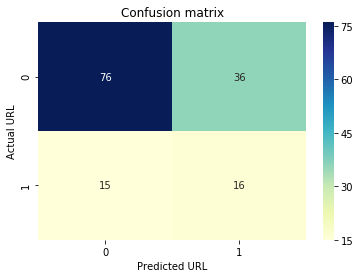

In [7]:
ufp.prepareCM(lr[3],lr[4])

### 4.6. Compute precision, recall, F-measure and support

This is done by calling ***prepareA*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **0** independent variables training set
- **2** dependent variable training set
- **3** dependent variable test set
- **4** dependent variable predicted test set results
- **6** Logistic Regression Model object

In [8]:
ufp.prepareA(lr[0],lr[2],lr[3],lr[4],lr[6])

The training accuracy 0.6
The testing accuracy: 0.6433566433566433
Precision: 0.3076923076923077
Recall: 0.5161290322580645


### 4.7. Display classification report

This is done by calling ***prepareC*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **3** dependent variable test set
- **4** dependent variable predicted test set results

In [9]:
ufp.prepareC(lr[3],lr[4])

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       112
           1       0.31      0.52      0.39        31

   micro avg       0.64      0.64      0.64       143
   macro avg       0.57      0.60      0.57       143
weighted avg       0.72      0.64      0.67       143



### 4.8. Display ROC Curve

This is done by calling ***prepareR*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **1** independent variables test set
- **3** dependent variable test set
- **4** dependent variable predicted test set results
- **6** Logistic Regression Model object

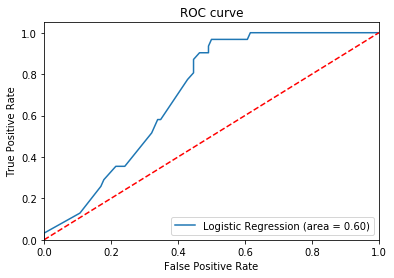

In [10]:
ufp.prepareR(lr[1],lr[3],lr[4],lr[6])

### 4.9. Predict URLs

These steps are used to predict the URLs of Enterprises in Statistical Business Register with the prepared Logistic Regression Model.

#### 4.9.1. Display the probabilities of Suggested URL

This is done by calling ***prepareP*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **pandas dataframe object** with **sum** column and **deduplicated** (data frame from 4.3.)
- **5** pandas dataframe object with independent variables
- **6** Logistic Regression Model object

The method returns a **pandas dataframe object** with the following structure:
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **URL** (Enterprise known URL from SBR)
- **Suggested URL** (URL of Enterprise that Serach Engine yields)
- **Link position** (order number of URL of Enterprise that Serach Engine yields)
- **Score** (calculates a score from 4.4. Logistic Regression Model Fitting)
- **predict** (0 or 1 the result from prediction of Logistic Regression Model object over pandas dataframe object with independent variables)
- **0** (false probability from prediction of Logistic Regression Model object over pandas dataframe object with independent variables)
- **1** (true probability from prediction of Logistic Regression Model object over pandas dataframe object with independent variables)

In [11]:
df_new=ufp.prepareP(dflr,lr[5],lr[6])
df_new

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.454821,0.545179
1,000000000,National Statistical Institute,3.0,0.00,https://www.niss.org/,NaN,0,0.949134,0.050866
2,000000000,National Statistical Institute,4.0,3.84,https://ec.europa.eu/eurostat/web/links,NaN,0,0.761672,0.238328
3,000000000,National Statistical Institute,5.0,1.90,https://www.ons.gov.uk/,NaN,0,0.877018,0.122982
4,000000000,National Statistical Institute,7.0,0.00,https://nis.gov.kh/,NaN,0,0.949134,0.050866
5,000000000,National Statistical Institute,9.0,13.65,https://www.statistics.gr/en/home/,NaN,0,0.898545,0.101455
6,000000001,STATISTIK AUSTRIA,0.0,95.00,https://statistik.at/,http://www.statistik.at,1,0.499079,0.500921
7,000000001,STATISTIK AUSTRIA,1.0,94.05,https://www.statistik.at/web_de/statistiken/in...,http://www.statistik.at,0,0.553046,0.446954
8,000000001,STATISTIK AUSTRIA,2.0,58.80,https://www.statistik.at/web_en/,http://www.statistik.at,0,0.553046,0.446954
9,000000001,STATISTIK AUSTRIA,4.0,91.20,http://www.statistik-austria.at/,http://www.statistik.at,1,0.499079,0.500921


#### 4.9.2. Drop duplicates from probabilities of Suggested URL

This is done by calling ***prepareS*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **pandas dataframe object** from previous step 4.9.1.

The method removes duplicates by **ID**, **Link position**, **Suggested URL** and **URL** and keeping only the first occurrence and returns **pandas dataframe object** without changing the initial structure.

In [12]:
df_sug=ufp.prepareS(df_new)
df_sug

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.454821,0.545179
1,000000000,National Statistical Institute,3.0,0.00,https://www.niss.org/,NaN,0,0.949134,0.050866
2,000000000,National Statistical Institute,4.0,3.84,https://ec.europa.eu/eurostat/web/links,NaN,0,0.761672,0.238328
3,000000000,National Statistical Institute,5.0,1.90,https://www.ons.gov.uk/,NaN,0,0.877018,0.122982
4,000000000,National Statistical Institute,7.0,0.00,https://nis.gov.kh/,NaN,0,0.949134,0.050866
5,000000000,National Statistical Institute,9.0,13.65,https://www.statistics.gr/en/home/,NaN,0,0.898545,0.101455
6,000000001,STATISTIK AUSTRIA,0.0,95.00,https://statistik.at/,http://www.statistik.at,1,0.499079,0.500921
7,000000001,STATISTIK AUSTRIA,1.0,94.05,https://www.statistik.at/web_de/statistiken/in...,http://www.statistik.at,0,0.553046,0.446954
8,000000001,STATISTIK AUSTRIA,2.0,58.80,https://www.statistik.at/web_en/,http://www.statistik.at,0,0.553046,0.446954
9,000000001,STATISTIK AUSTRIA,4.0,91.20,http://www.statistik-austria.at/,http://www.statistik.at,1,0.499079,0.500921


#### 4.9.3. Display predicted URLs of Enterprises

This is done by calling ***prepareSS*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **pandas dataframe object** from previous step 4.9.2.
- **probability** a decimal form 0 to 1 to show only records with true probability (column **1**) over this parameter
- **True** to show all records

The method returns **pandas dataframe object** without changing the initial structure (with third parameter **True**).

In [13]:
df_sel=ufp.prepareSS(df_sug,0.5,True)
df_sel

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.454821,0.545179
10,000000001,STATISTIK AUSTRIA,7.0,106.02,https://www.statistik.gv.at/,http://www.statistik.at,1,0.355921,0.644079
12,000000002,STATISTIK AUSTRIA,0.0,95.00,https://statistik.at/,NaN,1,0.499079,0.500921
18,000000003,STATISTIK AUSTRIA,0.0,95.00,https://statistik.at/,NaN,1,0.499079,0.500921
28,000000004,STATISTIK AUSTRIA,7.0,106.02,https://www.statistik.gv.at/,NaN,1,0.355921,0.644079
30,000000005,STATISTIK AUSTRIA,0.0,95.00,https://statistik.at/,NaN,1,0.499079,0.500921
38,000000006,Institute of Statistics,4.0,72.00,http://instat.gov.al/en,http://www.instat.gov.al,1,0.454821,0.545179
42,000000007,Institute of Statistics,4.0,72.00,http://instat.gov.al/en,NaN,1,0.454821,0.545179
46,000000008,Institute of Statistics,4.0,73.92,http://instat.gov.al/en,http://www.instat.gov.al,1,0.454821,0.545179
50,000000009,Institute of Statistics,4.0,88.32,http://instat.gov.al/en,http://www.instat.gov.al,1,0.355921,0.644079


#### 4.9.4. Display predicted URLs of Enterprises

This is done by calling ***prepareSS*** method of the ***URLsFinderPrepare*** class with the following parameters:
- **pandas dataframe object** from previous step 4.9.2.
- **probability** a decimal form 0 to 1 to show only records with true probability (column **1**) over this parameter
- **False** to show only records with **URL** column equal to null

The method returns **pandas dataframe object** with following structure (with third parameter **False**):
- **ID** (SBR Enterprise ID)
- **Name** (Enterprise name)
- **Logistic Regression Suggested URL** (The probable URL of the Enterprise with the prepared Logistic Regression Model)

In [14]:
df_sel=ufp.prepareSS(df_sug,0.5,False)
df_sel

,ID,Name,Logistic Regression Suggested URL
0,000000000,National Statistical Institute,https://www.nsi.bg
1,000000002,STATISTIK AUSTRIA,https://statistik.at
2,000000003,STATISTIK AUSTRIA,https://statistik.at
3,000000004,STATISTIK AUSTRIA,https://www.statistik.gv.at
4,000000005,STATISTIK AUSTRIA,https://statistik.at
5,000000007,Institute of Statistics,http://instat.gov.al
6,000000010,Institute of Statistics,http://instat.gov.al
7,000000023,Statistics Belgium,https://statbel.fgov.be
8,000000036,Hellenic Statistical Authority,https://www.statistics.gr
9,000000038,Statistics Denmark,https://www.dst.dk


#### 2.3.2. Event logging end

In [30]:
log.endLogging()